# 1.1: Intro to using pandas

You already have some practice with pandas from the intro to visualization from last week. Pandas is the most popular python packages for managing data sets and is used extensively by data scientists working in python.

## Importing pandas refresher

Import pandas at the top of your notebook like so:

In [1]:
import pandas as pd

Recall that the ```import pandas as pd``` syntax nicknames the pandas module as pd for convenience.

## Loading a csv into a DataFrame

Pandas can load multiple types of files, but one of the most common filetypes for storing data is as ```.csv``` files. Let's load a dataset on drug use by age from the ```assets/datasets``` directory:

In [7]:
drug = pd.read_csv('/Users/Paul/Desktop/General_Assembly/DSI_SM_01/curriculum/week-02/1.1-lesson/datasets/drug-use-by-age.csv')

#drug.head()

This creates a pandas object called a **DataFrame**. These are powerful containers for data with many built-in functions to explore and manipulate data.

We will hardly be covering all of the functionality of DataFrames in this lesson, but over the course of this class you will be getting very used to working with them.

## Exploring data using DataFrames

DataFrames come with built in functionality for doing initial data exploration quickly. 

Let's start by looking at the "header" of your data with the ```.head()``` built-in function. If run alone in a notebook cell, it will show you the first and last handful of columns and the first 5 rows.

In [10]:
drug.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

If we want to see the last part of our data, we can equivalently use the ```.tail()``` function.

In [11]:
drug.tail(1)

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
16  65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
16                 36.0          0.0                 -        0.0   

   crack-frequency        ...          oxycontin-use oxycontin-frequency  \
16               -        ...                    0.0                   -   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
16               0.2                     5.0            0.0   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
16               364.0       0.0               -           0.0   

   sedative-frequency  
16               15.0  

[1 rows x 28 columns]

### Data dimensions

It's good to look at what the dimensions of your data are. The ```.shape``` property will tell you the rows and colum counts of your DataFrame.

In [12]:
drug.shape

(17, 28)

We can see we have 17 rows and 28 columns. This is obviously quite a small dataset and already describes the aggregate statistics for these groups.

You will notice that this is the same property format as for numpy arrays/matricies. Pandas makes use of numpy under the hood for optimization and speed with numbers.

Look at the names of your columns with the ```.columns``` property.

[Note: You will see the columns having the **u'string'** and can most of the time safely ignore this as the column names are typically loaded in as ascii and not unicode]

In [13]:
drug.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

Accessing a specific column is easy. You can use the bracket syntax just like numpy arrays or python lists with the string name of the column to get out the column.

In [15]:
drug['marijuana-use'].head()

0     1.1
1     3.4
2     8.7
3    14.5
4    22.5
Name: marijuana-use, dtype: float64

As you can see we can also use the ```.head()``` function on the columns.

You can also access a column or multiple columns with a list of strings.

In [14]:
drug[['crack-use']].head()

crack-use
0        0.0
1        0.0
2        0.0
3        0.1
4        0.0

In [15]:
drug[['age','crack-use']].head()

age  crack-use
0  12        0.0
1  13        0.0
2  14        0.0
3  15        0.1
4  16        0.0

There is an important difference between using a list of strings and just a string with a column's name: when you use a list with the string it returns another **DataFrame**, but when you use just the string it returns a pandas **Series** object.

In [16]:
print(type(drug['age']))

print(type(drug[['age']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


What is the difference between a pandas Series and DataFrame object?

Essentially, a **Series** object contains the data for a single column of your data, and the **DataFrame** is a dictionary-like container for those Series objects that comprise your data.

As long as your column names have no spaces or other specialized characters in them (underscores are ok), you can access a column as a property of the dataframe.

In [21]:
#drug.age.head()

drug.n.head()

0    2798
1    2757
2    2792
3    2956
4    3058
Name: n, dtype: int64

Keep in mind that this will be a **Series**, not a DataFrame.

### .describe()

The ```.describe()``` function is very useful for taking a quick look at your data. It gives you some of the basic statistics we went over last week.

Use the ```.describe()``` function on just the ```crack-use``` column.

In [25]:
#drug['crack-use'].describe()

drug['crack-use'].describe()

count    17.000000
mean      0.294118
std       0.235772
min       0.000000
25%       0.000000
50%       0.400000
75%       0.500000
max       0.600000
Name: crack-use, dtype: float64

Or use it on multiple columns, such as ```crack-use``` and ```alcohol-frequency```.

In [26]:
drug[['crack-use','alcohol-frequency', 'marijuana-use']].describe()

crack-use  alcohol-frequency  marijuana-use
count  17.000000          17.000000      17.000000
mean    0.294118          33.352941      18.923529
std     0.235772          21.318833      11.959752
min     0.000000           3.000000       1.100000
25%     0.000000          10.000000       8.700000
50%     0.400000          48.000000      20.800000
75%     0.500000          52.000000      28.400000
max     0.600000          52.000000      34.000000

```.describe()``` gives us these statistics:

- **count**, which is equivalent to the number of cells (rows)
- **mean**, the average of the values in the column
- **std**, which is the standard deviation
- **min**, the minimum value
- **25%**, the 25th percentile of the values 
- **50%**, the 50th percentile of the values, which is the equivalent to the median
- **75%**, the 75th percentile of the values
- **max**, the maximum value

There are math functions that will work on all of the columns of a DataFrame at once, or subsets of the data.

I can use the ```.mean()``` function on ```drug``` to get the mean for every column.

In [31]:
drug.mean()

#import matplotlib.pyplot as plt
#%matplotlib inline

#plt.hist(drug)

n                          3251.058824
alcohol-use                  55.429412
alcohol-frequency            33.352941
marijuana-use                18.923529
marijuana-frequency          42.941176
cocaine-use                   2.176471
crack-use                     0.294118
heroin-use                    0.352941
hallucinogen-use              3.394118
hallucinogen-frequency        8.411765
inhalant-use                  1.388235
pain-releiver-use             6.270588
pain-releiver-frequency      14.705882
oxycontin-use                 0.935294
tranquilizer-use              2.805882
tranquilizer-frequency       11.735294
stimulant-use                 1.917647
stimulant-frequency          31.147059
meth-use                      0.382353
sedative-use                  0.282353
sedative-frequency           19.382353
dtype: float64

### Indexing 

More often than not, we want to operate on or extract specific portions of our data. When we perform indexing on a DataFrame or Series we are specifying this specific section of the data.

Pandas has three properties that you can use for indexing:

- **.loc** indexes with the _labels_ for rows and columns
- **.iloc** indexes with the _integer positions_ for rows and columns
- **.ix** indexes with _both labels and integer positions_

To help clarify these differences, lets first re-set the row labels to letters using the ```.set_index()``` function.

In [32]:
new_index_values = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']
drug.index = new_index_values


drug.index

Index([u'A', u'B', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'J', u'K', u'L',
       u'M', u'N', u'O', u'P', u'Q'],
      dtype='object')

In [33]:
drug.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
A  12  2798          3.9                3.0            1.1   
B  13  2757          8.5                6.0            3.4   
C  14  2792         18.1                5.0            8.7   
D  15  2956         29.2                6.0           14.5   
E  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
A                  4.0          0.1               5.0        0.0   
B                 15.0          0.1               1.0        0.0   
C                 24.0          0.1               5.5        0.0   
D                 25.0          0.5               4.0        0.1   
E                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
A               -        ...                    0.1                24.5   
B             3.0        ...                    0.1                41.0   
C               -        ...                    0.4                 4.5   
D             9.5        ...                    0.8                 3.0   
E             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
A               0.2                    52.0            0.2   
B               0.3                    25.5            0.3   
C               0.9                     5.0            0.8   
D               2.0                     4.5            1.5   
E               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
A                 2.0       0.0               -           0.2   
B                 4.0       0.1             5.0           0.1   
C                12.0       0.1            24.0           0.2   
D                 6.0       0.3            10.5           0.4   
E                 9.5       0.3            36.0           0.2   

  sedative-frequency  
A               13.0  
B               19.0  
C               16.5  
D               30.0  
E                3.0  

[5 rows x 28 columns]

Using the **.loc** indexer, we can pull out the rows **B thru F** and the columns **marijuana-use and marijuana-frequency**.

In [36]:
subset = drug.loc[['B','C','D','E','F'], ['crack-use','crack-frequency']]

In [37]:
subset

crack-use crack-frequency
B        0.0             3.0
C        0.0               -
D        0.1             9.5
E        0.0             1.0
F        0.1            21.0

We can do the same thing with the **.iloc** indexer, but we have to use integers.

In [33]:
subset = drug.iloc[[1,2,3,4,5], [4,5]]

In [34]:
subset

marijuana-use  marijuana-frequency
B            3.4                 15.0
C            8.7                 24.0
D           14.5                 25.0
E           22.5                 30.0
F           28.0                 36.0

If we you to index the rows or columns with integers using **.loc**, you will get an error.

The **.ix** indexer can use both integers and labels mixed together. 

In [37]:
subset = drug.ix[[1,2,3,4,5], ['marijuana-use','marijuana-frequency']]

In [38]:
subset

marijuana-use  marijuana-frequency
B            3.4                 15.0
C            8.7                 24.0
D           14.5                 25.0
E           22.5                 30.0
F           28.0                 36.0

It's also useful to note that you can automatically reorder the data just by re-ordering the indices that you enter when you perform the indexing operation!

In [39]:
subset = drug.ix[['F','E','D'], ['marijuana-frequency','marijuana-use']]

In [40]:
subset

marijuana-frequency  marijuana-use
F                 36.0           28.0
E                 30.0           22.5
D                 25.0           14.5

## Creating DataFrames

The simplest way to create your own dataframe when you are not importing from a file is to give the ```DataFrame()``` initializer a dictionary

In [2]:
mydata = pd.DataFrame({'Letters':['A','B','C'], 'Integers':[1,2,3], 'Floats':[2.2, 3.3, 4.4]})

In [3]:
mydata

Floats  Integers Letters
0     2.2         1       A
1     3.3         2       B
2     4.4         3       C

As you might expect, your data in the dictionary needs to have lists of values that are all the same length.

## Examining data types

Pandas comes with a useful property to look at the data types of your DataFrame columns. Just use ```.dtypes``` on your DataFrame

In [45]:
mydata.dtypes

Floats      float64
Integers      int64
Letters      object
dtype: object

In [38]:
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

This will show you what data type each column is. Strings are stored as a type called "object" because they are not guaranteed to take up a set amount of space (strings can be of any length).

## Renaming and assignment

Pandas makes it easy to change column names and assign values to your DataFrame.

Say we wanted to change the column name "Integers" to "int":

In [7]:
mydata.rename(columns={mydata.columns[1]:'int'}, inplace=True)
print(mydata.columns)

Index([u'Floats', u'int', u'Letters'], dtype='object')


In [5]:
mydata

Floats  Integers Letters
0     2.2         1       A
1     3.3         2       B
2     4.4         3       C

If you wanted to change every column name, you could just assign a new list to the ```.columns``` property.

In [49]:
mydata.columns = ['A','B','C']
print(mydata.head())

     A  B  C
0  2.2  1  A
1  3.3  2  B
2  4.4  3  C


We can assign values using the indexing that we learned before.

Let's change the newly renamed "B" column at row index 1 to be 100.

In [50]:
mydata.ix[1, 'B'] = 100
print(mydata.head())

     A    B  C
0  2.2    1  A
1  3.3  100  B
2  4.4    3  C


Alternatively we can assign multiple values at once with lists.

In [51]:
mydata.ix[:, 'A'] = [0,0,0]
print(mydata.head())

mydata.ix[0, ['B','C']] = [-1000, 'newstring']
print(mydata.head())

   A    B  C
0  0    1  A
1  0  100  B
2  0    3  C
   A     B          C
0  0 -1000  newstring
1  0   100          B
2  0     3          C


## Basic plotting using DataFrames

DataFrames also come with some basic convenience functions for plotting data. First let's import matplotlib and set it to run "inline" in your notebook.

In [53]:
import matplotlib.pyplot as plt

%matplotlib inline

Using our ```drug``` DataFrame again, use the ```.plot()``` function to plot the **age** columns against the **marijuana-use** column.

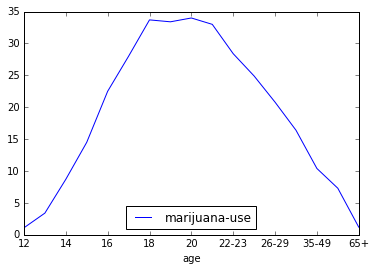

In [56]:
drug.plot(x='age', y='marijuana-use')

In [40]:
#drug

The ```.hist()``` function will create a histogram for a column's values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118885550>]], dtype=object)

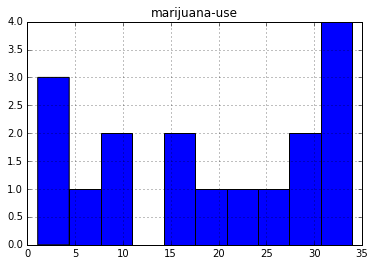

In [57]:
drug.hist('marijuana-use')

## Filtering

One of the most powerful features of DataFrames is using logic to filter data.

Subset the ```drug``` data for only the rows where marijuana-use is greater than 20.

In [41]:
drug[drug['marijuana-use'] > 30]

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
G  18  2469         58.7               24.0           33.7   
H  19  2223         64.6               36.0           33.4   
I  20  2271         69.7               48.0           34.0   
J  21  2354         83.2               52.0           33.0   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
G                 52.0          3.2               5.0        0.4   
H                 60.0          4.1               5.5        0.5   
I                 60.0          4.9               8.0        0.6   
J                 52.0          4.8               5.0        0.5   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
G            10.0        ...                    1.7                 7.0   
H             2.0        ...                    1.5                 7.5   
I             5.0        ...                    1.7                12.0   
J            17.0        ...                    1.3                13.5   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
G               4.9                    12.0            3.0   
H               4.2                     4.5            3.3   
I               5.4                    10.0            4.0   
J               3.9                     7.0            4.1   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
G                 8.0       0.5            12.0           0.4   
H                 6.0       0.4           105.0           0.3   
I                12.0       0.9            12.0           0.5   
J                10.0       0.6             2.0           0.3   

  sedative-frequency  
G               10.0  
H                6.0  
I                4.0  
J                9.0  

[4 rows x 28 columns]

As we saw before, you can use the ampersand sign to subset where multiple conditions need to be met for each row. 

Subset the data for marijuana use over 20, as before, but now also where the n is greater than 4000.

In [63]:
drug[(drug['marijuana-use'] > 20) & (drug.n > 4000)]

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
K  22-23  4707         84.2               52.0           28.4   
L  24-25  4591         83.1               52.0           24.9   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
K                 52.0          4.5               5.0        0.5   
L                 60.0          4.0               6.0        0.5   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
K             5.0        ...                    1.7                17.5   
L             6.0        ...                    1.3                20.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
K               4.4                    12.0            3.6   
L               4.3                    10.0            2.6   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
K                10.0       0.6            46.0           0.2   
L                10.0       0.7            21.0           0.2   

  sedative-frequency  
K               52.0  
L               17.5  

[2 rows x 28 columns]